In [1]:
import numpy as np
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

## Test "Доверительные интервалы для среднего"

In [2]:
data = np.empty((0, 0))
south_data = np.empty((0, 0))
north_data = np.empty((0, 0))
with open('water.txt', 'r') as f:
    next(f)
    lines = f.readlines()
    for line in lines:
        words = line.split('\t')
        data = np.append(data, int(words[len(words)-2]))
        if words[0] == 'South':
            south_data = np.append(south_data, int(words[len(words)-2]))
        elif words[0] == 'North':
            north_data = np.append(north_data, int(words[len(words)-2]))

In [3]:
data_mean = data.mean()
data_mean_std = data.std(ddof=1)/np.sqrt(data.size)

In [4]:
_tconfint_generic(data_mean, data_mean_std,
                  data.size - 1,
                  0.05, 'two-sided')

(1476.0833413552848, 1572.2117406119285)

In [5]:
south_data_mean = south_data.mean()
south_data_mean_std = south_data.std(ddof=1)/np.sqrt(south_data.size)

In [6]:
_tconfint_generic(south_data_mean, south_data_mean_std,
                  south_data.size - 1,
                  0.05, 'two-sided')

(1320.1517462936238, 1433.463638321761)

In [7]:
north_data_mean = north_data.mean()
north_data_mean_std = north_data.std(ddof=1)/np.sqrt(north_data.size)

In [8]:
_tconfint_generic(north_data_mean, north_data_mean_std,
                  north_data.size - 1,
                  0.05, 'two-sided')

(1586.5605251961385, 1680.6394748038613)

In [9]:
n = (1.95996/0.1)**2

In [10]:
n

384.14432015999995

## Test "Доверительные интервалы для долей"

In [11]:
from statsmodels.stats.proportion import proportion_confint
from statsmodels import stats

In [12]:
normal_interval = proportion_confint(1, 50, alpha=0.05, method = 'normal')

In [13]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.000000, 0.058805] with width 0.058805


In [14]:
wilson_interval = proportion_confint(1, 50, method = 'wilson')

In [15]:
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.003539, 0.104954] with width 0.101415


In [16]:
def N(p):
    return np.ceil((1.95996 * np.sqrt(p*(1 - p)) / 0.01)**2)

In [17]:
N(0.02)

753.0

In [18]:
import matplotlib.pyplot as plt

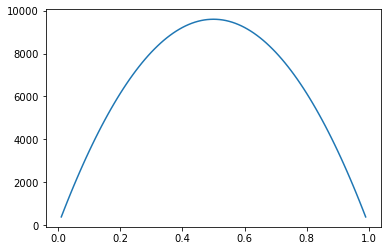

In [19]:
p = np.arange(0.01, 1, 0.01)
plt.plot(p, N(p))

In [20]:
np.amax(N(p))

9604.0

## Test "Доверительные интервалы"

In [21]:
from scipy import stats

Давайте уточним правило трёх сигм. Утверждение: 99.7% вероятностной массы случайной величины X\sim N\left(\mu,\sigma^2\right)X∼N(μ,σ 
2
 ) лежит в интервале \mu\pm c \cdot \sigmaμ±c⋅σ. Чему равно точное значение константы cc? Округлите ответ до четырёх знаков после десятичной точки.

In [22]:
stats.norm.ppf(1-(1-0.997)/2)

2.9677379253417717

Вопрос 5
В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [23]:
aspirin_data = np.array( [1 if i<104 else 0 for i in range(11037)] )
placebo_data = np.array( [1 if i<189 else 0 for i in range(11034)] )

In [24]:
prob_infarction_aspirin = aspirin_data.sum() / aspirin_data.shape[0]
prob_infarction_placebo = placebo_data.sum() / placebo_data.shape[0]
print('Infarction probability (aspirin): %.4f' % prob_infarction_aspirin)
print('Infarction probability (placebo): %.4f' % prob_infarction_placebo)
print('Infarction probability decrease: %.4f' % (prob_infarction_placebo - prob_infarction_aspirin))

Infarction probability (aspirin): 0.0094
Infarction probability (placebo): 0.0171
Infarction probability decrease: 0.0077


Постройте теперь 95% доверительный интервал для снижения вероятности инфаркта при приёме аспирина. Чему равна его верхняя граница? Округлите ответ до четырёх знаков после десятичной точки.

In [25]:
def proportions_confint_diff_ind(sample1, sample2, alpha=0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [26]:
print('Confidence interval: [%.4f, %.4f]' % proportions_confint_diff_ind(placebo_data, aspirin_data))

Confidence interval: [0.0047, 0.0107]


Продолжим анализировать данные эксперимента Гарвардской медицинской школы.

Для бернуллиевских случайных величин X\sim Ber(p)X∼Ber(p) часто вычисляют величину \frac{p}{1-p} 
1−p
p
​	
 , которая называется шансами (odds). Чтобы оценить шансы по выборке, вместо pp нужно подставить \hat{p} 
p
^
​	
 . Например, шансы инфаркта в контрольной группе, принимавшей плацебо, можно оценить как

\frac{\frac{189}{11034}}{1-\frac{189}{11034}} = \frac{189}{11034-189}\approx 0.0174 
1− 
11034
189
​	
 
11034
189
​	
 
​	
 = 
11034−189
189
​	
 ≈0.0174

Оцените, во сколько раз понижаются шансы инфаркта при регулярном приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [27]:
def odds(data):
    p = data.sum() / data.shape[0]
    return p / (1 - p)

In [28]:
odds_aspirin = odds(aspirin_data)
print('Odds aspirin: %.4f' % odds_aspirin)
odds_placebo = odds(placebo_data)
print('Odds placebo: %.4f' % odds_placebo)

Odds aspirin: 0.0095
Odds placebo: 0.0174


In [29]:
print('Times decrease of infarction: %.4f' % (odds_placebo / odds_aspirin))

Times decrease of infarction: 1.8321


Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;
установите random seed=0;
сделайте по 1000 псевдовыборок из каждой группы пациентов с помощью функции get_bootstrap_samples.

In [30]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [31]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [32]:
np.random.seed(0)
odds_aspirin_data = np.array(list(map(odds, get_bootstrap_samples(aspirin_data, 1000))))
odds_placebo_data = np.array(list(map(odds, get_bootstrap_samples(placebo_data, 1000))))

In [33]:
print('95%% confidence interval for times decrease of infarction: %s' %
      str(stat_intervals(odds_placebo_data / odds_aspirin_data, 0.05)))

95% confidence interval for times decrease of infarction: [1.44419465 2.34321168]


## Test "Практика проверки гипотез"

### 1 
По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [34]:
import numpy as np
from scipy import stats

In [35]:
stats.binom_test(67, 100, 0.75, alternative = 'two-sided')

0.08222258891386608

### 3
The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [42]:
x = np.empty((0, 0))
y = np.empty((0, 0))
with open('pines.txt', 'r') as f:
    next(f)
    lines = f.readlines()
    for line in lines:
        x = np.append(x, float(line.split('\t')[0]))
        y = np.append(y, float(line.split('\t')[1]))

In [51]:
xbins = np.arange(0, 240, 40)
ybins = np.arange(0, 240, 40)

In [52]:
ret = stats.binned_statistic_2d(x, y, None, 'count', bins=[xbins, ybins])

In [60]:
mean = ret.statistic.mean()
mean

23.36

In [57]:
np.max(ret.statistic)

50.0

In [74]:
data = ret.statistic.reshape(25,)
data

array([18., 26., 29., 25., 20., 14., 12., 22., 34., 25., 12., 24., 15.,
       50., 37.,  8., 19., 31., 50.,  7.,  7.,  8., 37., 27., 27.])

In [75]:
expected = mean * np.ones(25)
expected

array([23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36,
       23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36,
       23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36])

In [77]:
stats.chisquare(data, expected, ddof=0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)